## Task 3.2

This notebook contains tests and results related to Task 3.2

 For all algorithms as performance measure use Balanced Accuracy. The models should be trained
 on training set. The performance measure should be calculated on test set. Please average the results
 over at least 5 train-test splits. If the given algorithm does not converge, within 500 iterations, stop the
 algorithm and use the solutions from the last iteration.

In [1]:
import numpy as np
import pandas as pd
from models import IRLS
from models import SGD
from models import ADAM
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
import datasets.read as data
from matplotlib import pyplot as plt
import seaborn as sns

splits = np.arange(0.1, 0.55, 0.05)

def test_balanced_accuracy(X, y, splits, dataset_name):
  irls_acc = []
  sgd_acc = []
  adam_acc = []

  for split in splits:
    print(f'Test size: {split:.2f}')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, stratify=y)
    irls = IRLS()
    sgd = SGD()
    adam = ADAM()
    irls.fit(X_train, y_train)
    sgd.fit(X_train, y_train)
    adam.fit(X_train, y_train)
    y_pred_irls = irls.predict(X_test)
    y_pred_sgd = sgd.predict(X_test)
    y_pred_adam = adam.predict(X_test)
    irls_acc.append(balanced_accuracy_score(y_test, y_pred_irls))
    sgd_acc.append(balanced_accuracy_score(y_test, y_pred_sgd))
    adam_acc.append(balanced_accuracy_score(y_test, y_pred_adam))

  df = pd.DataFrame({'IRLS': irls_acc, 'SGD': sgd_acc, 'ADAM': adam_acc})
  test_csv_file = 'task3.2_results/'+ dataset_name +'_history.csv'
  with open(test_csv_file, mode='w') as f:
        df.to_csv(f)
  return df

def plt_boxplots(df, dataset_name):
  plt.boxplot(df, labels=df.columns)
  plt.title(f'Balanced Accuracy on dataset {dataset_name}')
  plt.ylabel('Balanced Accuracy');

## 1. Rice Cammeo Osmancik

Test size: 0.10
Test size: 0.15
Test size: 0.20
Test size: 0.25
Test size: 0.30
Test size: 0.35
Test size: 0.40
Test size: 0.45
Test size: 0.50


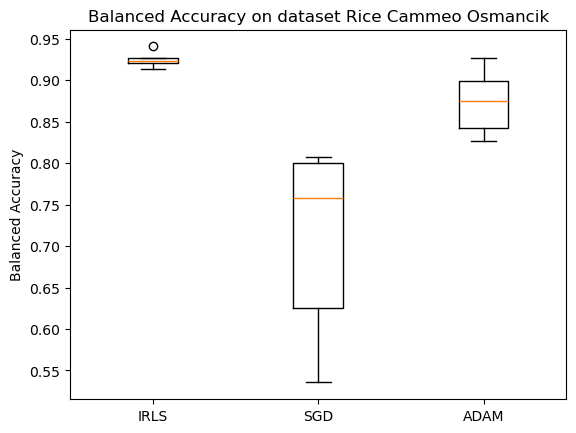

In [2]:
dataset = 'Rice Cammeo Osmancik'
X, y = data.read_Rice_Cammeo_Osmancik("datasets/")
test1 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test1, dataset)

## 2. Statlog (Shuttle)

Removing feature 2.0 with VIF 32579.038390905396
Removing feature 7.0 with VIF 8612.831759802706
Removing feature 0.0 with VIF 3215.465795857351
Test size: 0.10
Test size: 0.15
Test size: 0.20
Test size: 0.25
Test size: 0.30
Test size: 0.35
Test size: 0.40
Test size: 0.45
Test size: 0.50


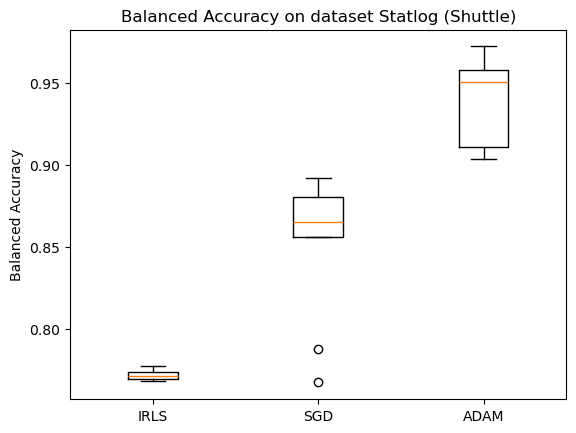

In [3]:
dataset = 'Statlog (Shuttle)'
X, y = data.read_Statlog_Shuttle("datasets/")
test2 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test2, dataset)

## 3. Banknote authentication

Test size: 0.10
Test size: 0.15
Test size: 0.20
Test size: 0.25
Test size: 0.30
Test size: 0.35
Test size: 0.40
Test size: 0.45
Test size: 0.50


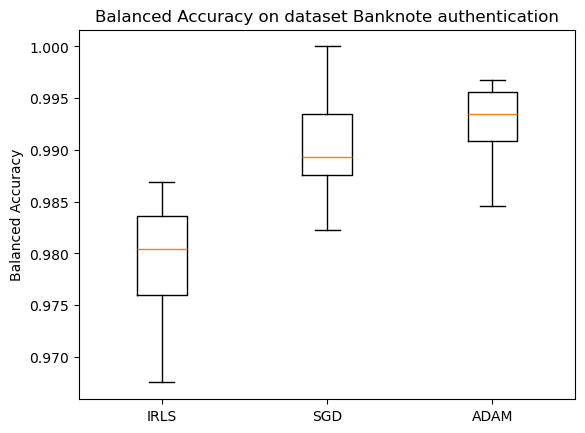

In [4]:
dataset = 'Banknote authentication'
X, y = data.read_Banknote_Authentication("datasets/")
test3 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test3, dataset)

## 4. Online Shoppers Purchasing Intention Dataset

Test size: 0.10
Test size: 0.15
Test size: 0.20
Test size: 0.25
Test size: 0.30
Test size: 0.35
Test size: 0.40
Test size: 0.45
Test size: 0.50


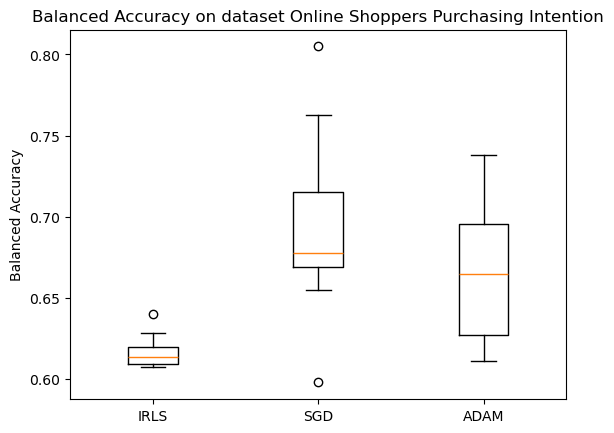

In [5]:
dataset = 'Online Shoppers Purchasing Intention'
X, y = data.read_Online_Shoppers_intention("datasets/")
test4 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test4, dataset)

## 5. EEG Eye State

Removing feature F4 with VIF 344295.0827767543
Removing feature P7 with VIF 273039.76934510545
Removing feature O2 with VIF 228057.39796163508
Removing feature T8 with VIF 158021.74517939796
Removing feature O1 with VIF 114580.65820650346
Removing feature F3 with VIF 109103.47547641455
Removing feature F8 with VIF 84743.84139977719
Removing feature FC6 with VIF 30461.684922613724
Removing feature P8 with VIF 14577.781320289298
Removing feature T7 with VIF 5435.016271267512
Test size: 0.10
Test size: 0.15
Test size: 0.20
Test size: 0.25
Test size: 0.30


d:\Karina\AML\aml_projects\Project1\models\irls.py:90: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-log_odds))


Test size: 0.35
Test size: 0.40
Test size: 0.45


d:\Karina\AML\aml_projects\Project1\models\irls.py:90: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-log_odds))


Test size: 0.50


d:\Karina\AML\aml_projects\Project1\models\irls.py:90: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-log_odds))


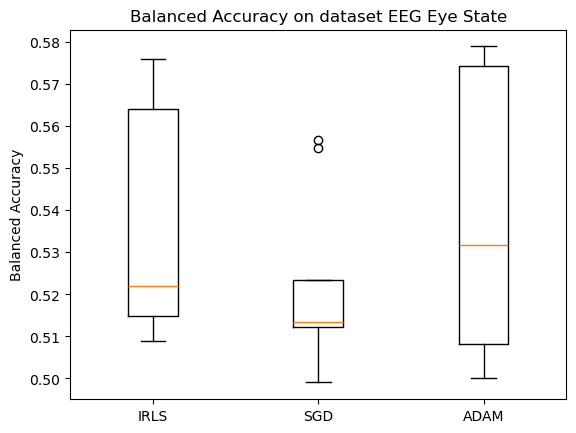

In [13]:
dataset = 'EEG Eye State'
X, y = data.read_EEG_Eye_State("datasets/")
X.shape
test5 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test5, dataset)

## 6. Web Page Phishing Dataset

Test size: 0.30
Test size: 0.35
Test size: 0.40
Test size: 0.45
Test size: 0.50
Test size: 0.55


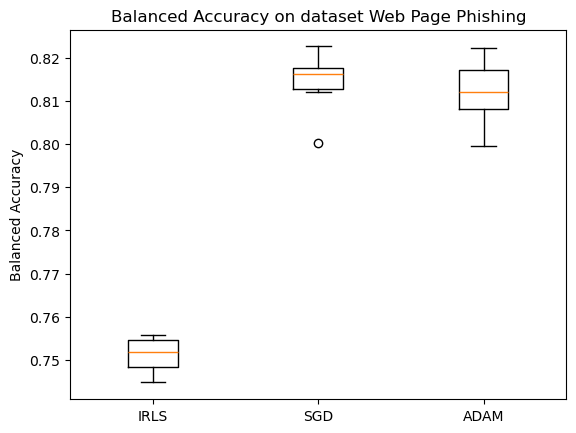

In [7]:
dataset = 'Web Page Phishing'
X, y = data.read_Web_Page_Phishing("datasets/")
fraction = int(X.shape[0]*0.5)
test6 = test_balanced_accuracy(X[:fraction], y[:fraction], np.arange(0.3, 0.55, 0.05), dataset)
plt_boxplots(test6, dataset)

## 7. Airline Satisfaction Dataset

Removing feature Inflight entertainment with VIF 26.843153575655386
Removing feature Inflight service with VIF 19.90893908950149
Removing feature Seat comfort with VIF 17.59735359498238
Removing feature Arrival Delay in Minutes with VIF 16.912256557213144
Removing feature Baggage handling with VIF 14.668427818938165
Removing feature Cleanliness with VIF 14.057187632762686
Removing feature Ease of Online booking with VIF 12.745709346209532
Removing feature Online boarding with VIF 11.240768800270368
Test size: 0.30
Test size: 0.35
Test size: 0.40
Test size: 0.45
Test size: 0.50
Test size: 0.55


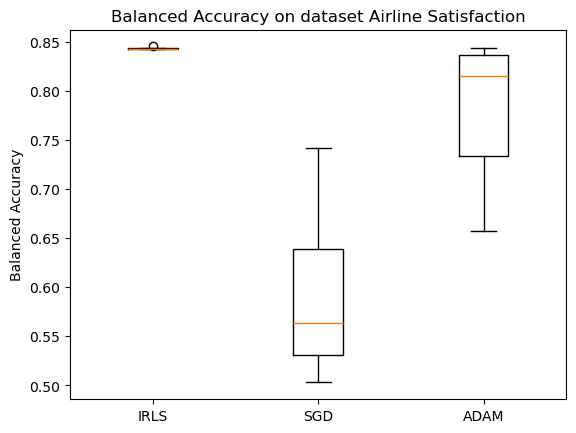

In [8]:
dataset = 'Airline Satisfaction'
X, y = data.read_Airline_Passenger_Satisfaction("datasets/")
fraction = int(X.shape[0]*0.5)
test7 = test_balanced_accuracy(X[:fraction], y[:fraction], np.arange(0.3, 0.55, 0.05), dataset)
plt_boxplots(test7, dataset)

## 8. Dataset for Link Phishing

c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature avg_word_host with VIF 273.15849919117323


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature longest_words_raw with VIF 136.36201416071702


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature length_words_raw with VIF 134.36826132490722


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature avg_words_raw with VIF 57.50578316564342


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature nb_subdomains with VIF 30.76614871841889


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature total_of: with VIF 23.778761243514936


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature url_length with VIF 20.731254935148378


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature ratio_intHyperlinks with VIF 18.794189032762517


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature hostname_length with VIF 18.383587332925266


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature total_of= with VIF 13.703791608528372


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature total_of/ with VIF 11.038164977667677


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature total_of. with VIF 8.29564008946486


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature longest_word_host with VIF 7.345018855304908


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature page_rank with VIF 6.602679301961414


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature avg_word_path with VIF 6.578493850036889


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Removing feature domain_in_title with VIF 5.2132041975789765


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered

Test size: 0.10
Test size: 0.15
Test size: 0.20
Test size: 0.25
Test size: 0.30
Test size: 0.35
Test size: 0.40
Test size: 0.45
Test size: 0.50


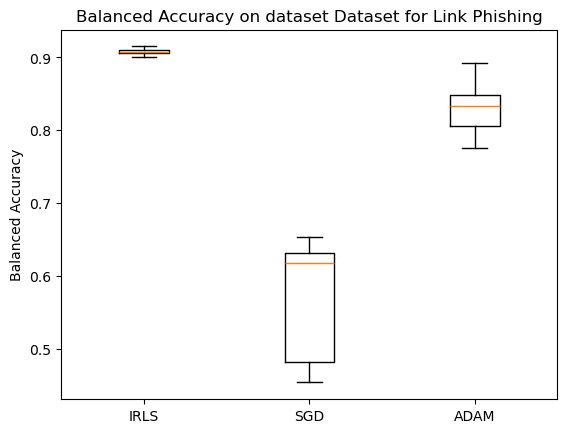

In [9]:
dataset = 'Dataset for Link Phishing'
X, y = data.read_Dataset_for_Link_Phishing("datasets/")
test8 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test8, dataset)

## 9. Optdigits

c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input4 with VIF 31.568246697082294


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input61 with VIF 25.428910461421868


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input11 with VIF 22.50871397808154


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input12 with VIF 21.663571189406504


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input3 with VIF 19.69471068068265


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input37 with VIF 15.431911644259669


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input60 with VIF 14.636128202847846


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input27 with VIF 13.735035935359546


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input14 with VIF 13.120941268953505


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input54 with VIF 12.833603711488854


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input5 with VIF 12.32631957216615


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input29 with VIF 11.275763189273558


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input38 with VIF 10.724261223612698


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input43 with VIF 10.108005549039063


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input13 with VIF 9.608534126925731


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input52 with VIF 8.806482854695567


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input53 with VIF 7.847358152816466


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input36 with VIF 7.838076874610565


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input55 with VIF 7.674635238927166


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input30 with VIF 7.121505944068317


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input62 with VIF 6.456387239342413


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input15 with VIF 6.210249452509575


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input19 with VIF 6.139450286448825


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input45 with VIF 5.575631666995436


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input28 with VIF 5.505750047756838


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Removing feature input35 with VIF 5.025036011123639


c:\Users\megav\anaconda3\envs\iml-10\lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Test size: 0.10
Test size: 0.15
Test size: 0.20
Test size: 0.25
Test size: 0.30
Test size: 0.35
Test size: 0.40
Test size: 0.45
Test size: 0.50


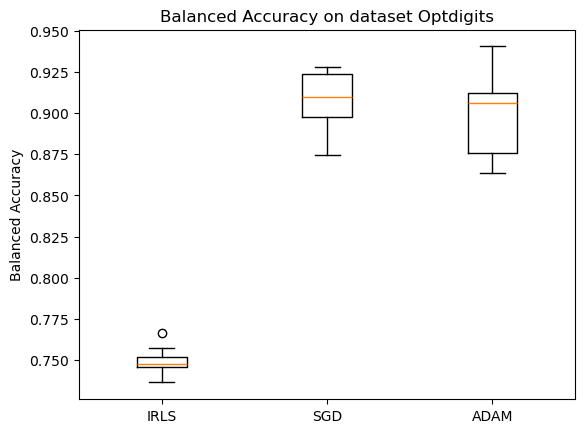

In [10]:
dataset = 'Optdigits'
X, y = data.read_Optdigits("datasets/")
test9 = test_balanced_accuracy(X, y, splits, dataset)
plt_boxplots(test9, dataset)

## Combined results

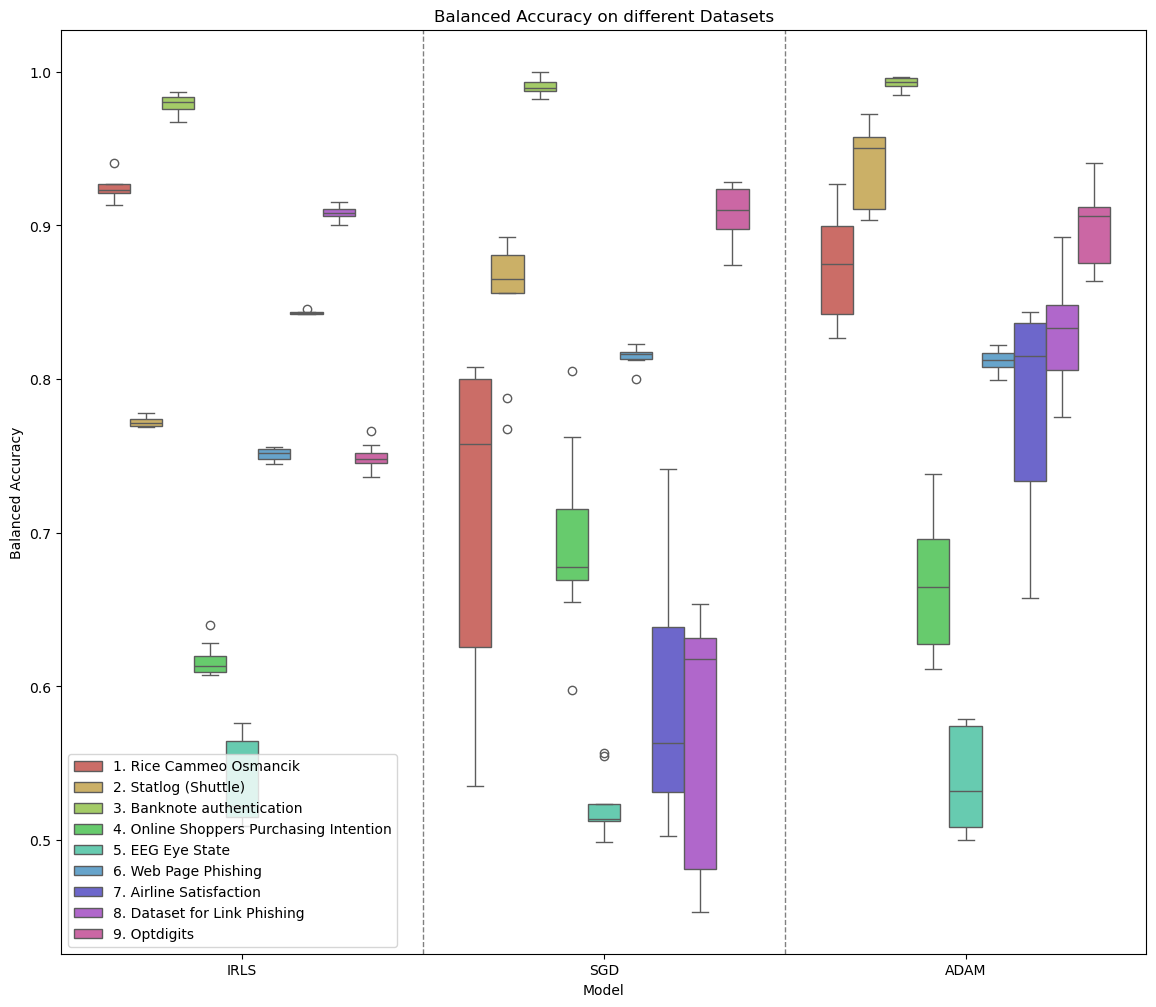

In [14]:
df1 = pd.read_csv('task3.2_results/Rice Cammeo Osmancik_history.csv', index_col=0)
df2 = pd.read_csv('task3.2_results/Statlog (Shuttle)_history.csv', index_col=0)
df3 = pd.read_csv('task3.2_results/Banknote authentication_history.csv', index_col=0)
df4 = pd.read_csv('task3.2_results/Online Shoppers Purchasing Intention_history.csv', index_col=0)
df5 = pd.read_csv('task3.2_results/EEG Eye State_history.csv', index_col=0)
df6 = pd.read_csv('task3.2_results/Web Page Phishing_history.csv', index_col=0)
df7 = pd.read_csv('task3.2_results/Airline Satisfaction_history.csv', index_col=0)
df8 = pd.read_csv('task3.2_results/Dataset for Link Phishing_history.csv', index_col=0)
df9 = pd.read_csv('task3.2_results/Optdigits_history.csv', index_col=0)

# Add a column to each dataframe to indicate dataframe source
df1['Source'] = '1. Rice Cammeo Osmancik'
df2['Source'] = '2. Statlog (Shuttle)'
df3['Source'] = '3. Banknote authentication'
df4['Source'] = '4. Online Shoppers Purchasing Intention'
df5['Source'] = '5. EEG Eye State'
df6['Source'] = '6. Web Page Phishing'
df7['Source'] = '7. Airline Satisfaction'
df8['Source'] = '8. Dataset for Link Phishing'
df9['Source'] = '9. Optdigits'

# Concatenate dataframes
combined_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

# Melt the dataframe to have 'variable' and 'value' columns
melted_df = pd.melt(combined_df, id_vars='Source', var_name='Column', value_name='Balanced Accuracy')

# Create boxplot
plt.figure(figsize=(14, 12))
ax = sns.boxplot(x='Column', y='Balanced Accuracy', hue='Source', data=melted_df, palette='hls')
# Draw dashed lines as separators between columns
num_columns = len(combined_df.columns) - 1  # Excluding the 'Source' column
for i in range(num_columns - 1):
  plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=1)

plt.title('Balanced Accuracy on different Datasets')
plt.xlabel('Model')
plt.ylabel('Balanced Accuracy')
plt.legend(loc='lower left')
plt.show()

In [15]:
dfg1 = df1.groupby('Source').mean()
dfg2 = df2.groupby('Source').mean()
dfg3 = df3.groupby('Source').mean()
dfg4 = df4.groupby('Source').mean()
dfg5 = df5.groupby('Source').mean()
dfg6 = df6.groupby('Source').mean()
dfg7 = df7.groupby('Source').mean()
dfg8 = df8.groupby('Source').mean()
dfg9 = df9.groupby('Source').mean()
combined_df = pd.concat([dfg1, dfg2, dfg3, dfg4, dfg5, dfg6, dfg7, dfg8, dfg9])
combined_df['IRLS']  *= 100
combined_df['SGD'] *= 100
combined_df['ADAM'] *= 100
combined_df.round(2)

,IRLS,SGD,ADAM
Source,,,
1. Rice Cammeo Osmancik,92.41,70.48,87.59
2. Statlog (Shuttle),77.19,85.35,94.08
3. Banknote authentication,97.93,99.07,99.22
4. Online Shoppers Purchasing Intention,61.73,69.65,66.78
5. EEG Eye State,53.84,52.10,53.84
6. Web Page Phishing,75.11,81.42,81.19
7. Airline Satisfaction,84.32,59.26,78.02
8. Dataset for Link Phishing,90.82,56.15,83.16
9. Optdigits,74.90,90.83,89.94
